In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mask = cv2.imread("./Resources/mask.png")
secret=cv2.imread('./Resources/secret_code.jpg')

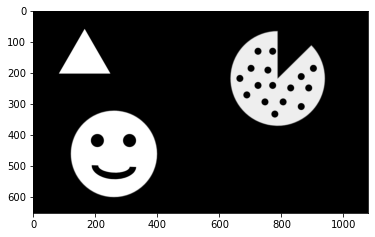

In [3]:
plt.imshow(mask)

In [4]:
modified_mask=cv2.resize(mask,(500,500))
modified_secret=cv2.resize(secret,(500,500))

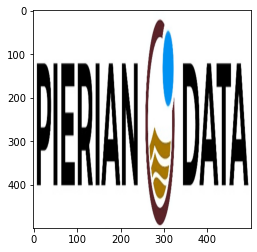

In [5]:
plt.imshow(modified_secret)

In [6]:
modified_secret.shape[1]

500

In [7]:
blank_img = np.zeros([500,500,3],dtype=np.uint8)
blank_img.fill(255) # or img[:] = 255

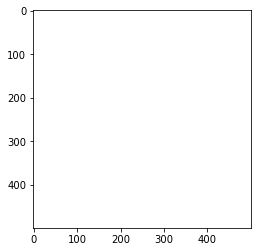

In [8]:
plt.imshow(blank_img)

In [9]:
blank_img.shape

(500, 500, 3)

In [10]:
def binary_to_deciaml(n): # takes string input && returns integer
    return(int(n,2))

def decimal_to_binary(n): # takes integer input && returns string
    return(format(n,'08b'))
def hide(x,y): # x is mask,  y in secret
    x_bin=decimal_to_binary(x)
    y_bin=decimal_to_binary(y)
    new_val_bin=x_bin[0:3]+y_bin[0:5]
    new_val_dec=binary_to_deciaml(new_val_bin)
    return new_val_dec
def hide_pixel(x,y): # x,y is list of B,G,R  x is mask,  y in secret
    new_x=[hide(x[0],y[0]),hide(x[1],y[1]),hide(x[2],y[2])]
    return new_x

In [11]:
for x in range (0,modified_secret.shape[0],1):
    for y in range(0,modified_secret.shape[1],1):
        secret_coor = modified_secret[y,x]
        mask_coor=modified_mask[y,x]
        blank_img[y,x]=hide_pixel(mask_coor,secret_coor)

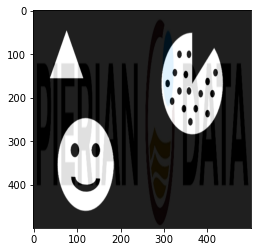

In [12]:
plt.imshow(blank_img)

In [13]:
def unhide_pixel(x):
    new_x=[unhide(x[0]),unhide(x[1]),unhide(x[2])]
    return new_x
def unhide(x):
    x_bin=decimal_to_binary(x)
    new_val_bin=x_bin[3:]+'000'
    new_val_dec=binary_to_deciaml(new_val_bin)
    return new_val_dec
    pass

In [14]:
decrypted_blank_img = np.zeros([500,500,3],dtype=np.uint8)
decrypted_blank_img.fill(255) # or img[:] = 255

In [15]:
for x in range (0,blank_img.shape[0],1):
    for y in range(0,blank_img.shape[1],1):
        current_coor = blank_img[y,x]
        decrypted_blank_img[y,x]=unhide_pixel(current_coor)

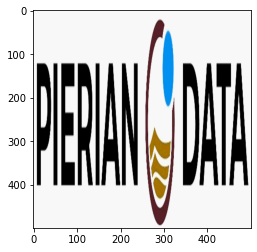

In [16]:
plt.imshow(decrypted_blank_img)